# Vector Spaces

In this lesson I'll continue on the topic of linear algebra by discussing vector spaces. Vector spaces are essential for abstracting linear algebra away from systems of equations and for visualizing linear algebra objects like vectors and matrices. Let's get started.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from utils.math_ml import *

## Vector Spaces

I've introduced matrices and vectors so far kind of organically as the natural way to write and solve systems of linear equations. They're good for a lot more than solving linear systems, however. For one thing, they possess important geometric properties. I'm now going to re-define the concepts covered so far, but in more geometric terms. 

### Visualizing Vectors

Let's go back to the simple 2-dimensional case. Imagine you have a point in the xy-plane, call it $(x,y)$. Now, we can think of this as a single point, but we can also imagine it differently. Suppose there was an arrow pointing from the origin $(0,0)$ to the point $(x,y)$. For example, if the point was $(1,1)$, this arrow might look like this.

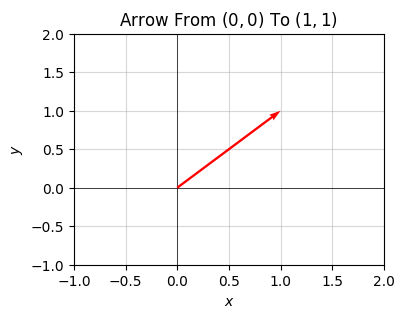

In [2]:
point = np.array([1, 1])
plot_vectors(point, title=f'Arrow From $(0,0)$ To $(1,1)$', ticks_every=0.5)

Unlike the *point* $(x,y)$, the *arrow* $(x,y)$ has both a length and a direction. Its length is given by the Pythagorean Theorem. If the triangle has base $x$ and height $y$, then the length of the arrow is just its hypotenuse, i.e. $r = \sqrt{x^2 + y^2}$. The direction of the arrow is its angle $\theta$ with respect to the x-axis. This angle is just given by the inverse tangent of height over base, i.e. $\theta = \tan^{-1}\big(\frac{y}{x}\big)$. 

In the example plotted, the length is $r=\sqrt{1+1}=\sqrt{2}$, and the angle is $\theta = \tan^{-1}(1) = 45^\circ$. These two values uniquely specify the arrow, assuming it starts at the origin. If we know the length and direction, we know exactly which arrow we're talking about.

What I've just shown is another way to define a vector. A **vector** is an arrow in the plane. Said differently, a vector is just a point that's also been endowed with a length (or magnitude) and a direction. The x and y values are called **components** of a vector. Usually we'll write a vector in bold-face and its components in regular type but with subscripts indicating which component. For example, $\mathbf{v}=(v_x,v_y)$. Here's the same arrow I plotted above, but explicitly labeled as a vector $\mathbf{v}=(1,1)$. Its components are $v_x=1$ and $v_y=1$.

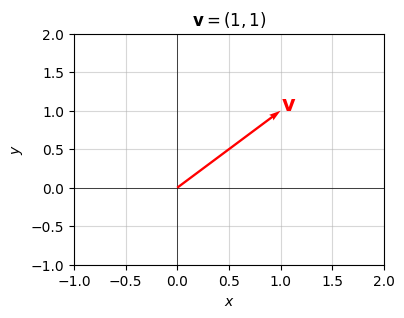

In [3]:
v = np.array([1, 1])
plot_vectors(v, title='$\mathbf{v}=(1,1)$', labels=['$\mathbf{v}$'], ticks_every=0.5)

**Notation:** It's common to represent vectors in a few different ways depending on the situation. One way to represent a vector is as a *column* vector. This is what I did when doing matrix-vector multiplication. Another way, what I just introduced, is a *flat* vector, or a 1-dimensional array. This is more common when thinking about a vector geometrically. Yet *another* way is to think of a vector as a *row* vector, which is the transpose of a column vector. All of these representations conceptually represent the same object, but their shapes are different. Here's an example: The size-2 vector $\mathbf{v}=(1,1)$ can be written in 3 different but all equivalent ways:

$$
\begin{align*}
&\text{Flat vector of shape } (2,): \mathbf{v} = (1,1), \\
&\text{Column vector of shape } (2,1): \mathbf{v} = \begin{pmatrix}
1 \\
1 \\
\end{pmatrix}, \\
&\text{Row vector of shape } (1,2): \mathbf{v}^\top = \begin{pmatrix}
1 & 1 \\
\end{pmatrix}.
\end{align*}
$$

Be careful when working with vectors in code to make sure you're using the right shapes for the right situation or you'll get shape mismatch errors (or worse a silent bug).

### Vector Operations

The magnitude, or length, of $\mathbf{v}$ is typically denoted by the symbol $||\mathbf{v}||$, called a **norm**,

$$||\mathbf{v}|| = \sqrt{v_x^2 + v_y^2}.$$

In the above example with $\mathbf{v}=(1,1)$, its norm is $||\mathbf{v}||=\sqrt{1+1}=\sqrt{2} \approx 1.414$.

Notice that the norm must be non-negative since it's the square root of a sum of squares, i.e. $||\mathbf{v}|| \geq 0$. This should sound right, after all negative lengths don't make any sense.

What happens if we scale a vector $\mathbf{v}$ by some scalar $c$? By the rules of scalar-vector multiplication, the new vector should be $c\mathbf{v}=(cx,cy)$. Since the new vector has length $||c\mathbf{v}||$, a little math shows that

$$||c\mathbf{v}|| = \sqrt{(cv_x)^2 + (cv_y)^2} = \sqrt{c^2(v_x^2 + v_y^2)} = |c| \sqrt{v_x^2 + v_y^2} = |c| \cdot ||\mathbf{v}||.$$

That is, the re-scaled vector $c\mathbf{v}$ just gets its length re-scaled by $c$. That's why $c$ is called a scalar. It rescales vectors. Notice if $c$ is negative, the length stays the same, but the direction gets reversed $180^\circ$ since in that case $c\mathbf{v} = c(v_x, v_y) = -|c|(v_x,v_y)$.

Here's what vector scaling looks like geometrically. I'll plot the vector $\mathbf{v}=(1,1)$ again, but scaled by two numbers, one $c=2$, the other $c=-1$. When $c=2$, the vector just doubles its length. That's the light blue arrow. When $c=-1$, the vector reverses its direction $180^\circ$, but maintains its length since $|c|=1$. That's the light orange arrow.

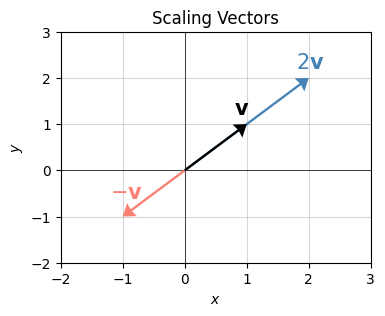

In [4]:
v = np.array([1, 1])
plot_vectors([v, -v, 2*v], xlim=(-2,3), ylim=(-2,3), title=f'Scaling Vectors', headwidth=7, ticks_every=1,
             labels=['$\mathbf{v}$', '$-\mathbf{v}$', '$2\mathbf{v}$'], 
             colors=['black', 'salmon', 'steelblue'],
             text_offsets=[[-0.2, 0.2], [-0.2, 0.4], [-0.2, 0.2]])

What does adding two vectors do? Let $\mathbf{v}=(v_x,v_y)$ and $\mathbf{w}=(w_x,w_y)$ be two vectors in the plane. Then their sum is $\mathbf{v}+\mathbf{w} = (v_x+w_x,v_y+w_y)$. I'll plot an example below with $\mathbf{v}=(1,1)$ and $\mathbf{w}=(1,3)$. Their sum should be 

$$\mathbf{v}+\mathbf{w}=(1+1,1+3)=(2,4).$$

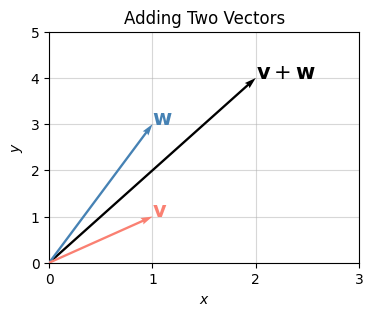

In [5]:
v = np.array([1, 1])
w = np.array([1, 3])
plot_vectors([v, w, v + w], xlim=(0, 3), ylim=(0, 5), title=f'Adding Two Vectors', ticks_every=1,
             labels=['$\mathbf{v}$', '$\mathbf{w}$', '$\mathbf{v}+\mathbf{w}$'], 
             colors=['salmon', 'steelblue', 'black'])

It may not be obvious yet what vector addition is doing geometrically. Let me plot it slightly differently. What I'll do is plot the vectors "head to tail" by taking the *tail* of $\mathbf{w}$ and placing it at the *head* of $\mathbf{v}$. Then the head of this translated $\mathbf{w}$ vector points at the head of the sum $\mathbf{v}+\mathbf{w}$.

Informally speaking, to add two vectors, just stack them on top of each other head to tail, and draw an arrow from the starting point to the ending point. You can geometrically add arbitrarily many vectors this way, not just two. Just keep stacking them.

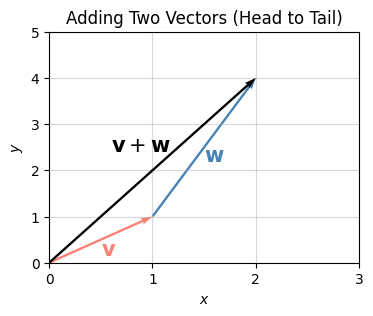

In [6]:
plot_vectors([v, w, v + w], xlim=(0, 3), ylim=(0, 5), title=f'Adding Two Vectors (Head to Tail)',
             colors=['salmon', 'steelblue', 'black'],
             tails=[[0, 0], [v[0], v[1]], [0, 0]], text_offsets=[[-0.5, -0.85], [0.5, -0.8], [-1.4, -1.6]],
             labels=['$\mathbf{v}$', '$\mathbf{w}$', '$\mathbf{v}+\mathbf{w}$'],
             zorders = [0, 1, 2], ticks_every=1)

The norm satisfies what's known as the **triangle inequality**: If $\mathbf{v}$ and $\mathbf{w}$ are two vectors, then the length of their sum is less than the sum of their individual lengths, i.e.

$$||\mathbf{v}+\mathbf{w}|| \leq ||\mathbf{v}|| + ||\mathbf{w}||.$$

You can see this by staring at the plot above. The added lengths of $\mathbf{v}$ and $\mathbf{w}$ is larger than the length of their sum $\mathbf{v}+\mathbf{w}$. In fact, the only time the lengths will be equal is if $\mathbf{v}$ and $\mathbf{w}$ are parallel to each other.

What about subtracting two vectors? By combining the rules for scalar multiplication and vector addition, you can convince yourself that the difference of two vectors is also element-wise, 

$$\mathbf{v}-\mathbf{w} = (v_x-w_x,v_y-w_y).$$

To visualize what subtracting two vectors looks like, notice we can write subtraction as a sum like this,
$\mathbf{w} + (\mathbf{v}-\mathbf{w}) = \mathbf{v}$. Now use the same trick for adding vectors, only this time placing $(\mathbf{v}-\mathbf{w})$ at the head of $\mathbf{w}$, and noticing that it points to the sum of the two, which is $\mathbf{v}$.

An easy way to remember what subtracting two vectors looks like is to connect the two vectors you're subtracting with a line segment, and place the head on the first vector. This trick will never fail you.

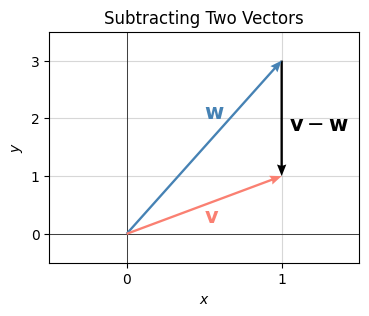

In [7]:
v = np.array([1, 1])
w = np.array([1, 3])
plot_vectors([v, w, v - w], xlim=(-0.5, 1.5), ylim=(-0.5, 3.5), title=f'Subtracting Two Vectors', headwidth=4,
             ticks_every=1, colors=['salmon', 'steelblue', 'black'],
             tails=[[0, 0], [0, 0], [w[0], w[1]]], text_offsets=[[-0.5, -0.8], [-0.5, -1], [1.05, 3.8]],
             labels=['$\mathbf{v}$', '$\mathbf{w}$', '$\mathbf{v}-\mathbf{w}$'])

### The Dot Product

It turns out we can understand both the lengths and angles of vectors in terms of a single operation called the **dot product**, also called the inner or scalar product. The dot product is a kind of multiplication between two vectors that returns a scalar. If $\mathbf{v}=(v_x,v_y)$ and $\mathbf{w}=(w_x,w_y)$ are two vectors in the plane, their dot product is defined as

$$\mathbf{v} \cdot \mathbf{w} = v_x w_x + v_y w_y.$$

That is, the dot product is just the sum of the element-wise products of the two vectors. 

In terms of vectorized numpy code, the dot product is just the operation `np.sum(v * w)`. Numpy also has a convenience function `np.dot(v, w)` that calculates it directly. Here's the calculation of the dot product between the two vectors $\mathbf{v}=(5,-1)$ and $\mathbf{w}=(2,4)$. The answer should be 

$$\mathbf{v} \cdot \mathbf{w} = 5 \cdot 2 + (-1) \cdot 4 = 10 - 4 = 6.$$

In [8]:
v = np.array([5, -1])
w = np.array([2, 4])
print(f'v . w = {np.dot(v, w)}')
np.sum(v * w) == np.dot(v, w)

v . w = 6


True

**Algorithm Analysis:** Evaluating the dot product takes $O(1)$ words of memory since the output is a scalar, and uses $2n-1$ total FLOPS since for a vector of size $n$ there are $n$ multiplications and $n-1$ additions. That's $O(n)$ FLOPS, which is generally considered pretty fast.

Here are some fairly trivial properties the dot product satisfies. These follow straight from the definition.
- The dot product of a vector with itself is nonnegative: $\mathbf{v} \cdot \mathbf{v} \geq 0$.
- The dot product commutes: $\mathbf{v} \cdot \mathbf{w} = \mathbf{w} \cdot \mathbf{v}$.
- The dot product distributes over scalar multiplication: $c\mathbf{v} \cdot \mathbf{w} = \mathbf{v} \cdot c\mathbf{w} = c(\mathbf{v} \cdot \mathbf{w})$.
- The dot product distributes over vector addition: $(\mathbf{u} + \mathbf{v}) \cdot \mathbf{w} = \mathbf{u} \cdot \mathbf{w} + \mathbf{v} \cdot \mathbf{w}$ and $\mathbf{v} \cdot (\mathbf{u}+\mathbf{w}) = \mathbf{v} \cdot \mathbf{u} + \mathbf{v} \cdot \mathbf{w}$.

**Notation**: The dot product is often written in several different ways in different fields. Another notation that we'll often use arises by thinking of the dot product as the matrix multiplication of a *row vector* $\mathbf{v}^\top$ with a *column vector* $\mathbf{w}$. In that case, $\mathbf{v}^\top \mathbf{w} = v_x w_x + v_y w_y$, which is exactly the same thing as the dot product. This is the notation most commonly used in machine learning.

We can write the norm or length of a vector in terms of the dot product. Observe that by dotting $\mathbf{v}$ with itself, I get

$$\mathbf{v} \cdot \mathbf{v} = v_x^2 + v_y^2 = ||\mathbf{v}||^2.$$

Taking the square root of both sides, you can see that the norm or length of a vector is just the square root of its dot product with itself,

$$||\mathbf{v}|| = \sqrt{\mathbf{v} \cdot \mathbf{v}}.$$

We can similarly express the angle of a vector with the x-axis in terms of the dot product. Let $\mathbf{e}_x=(1,0)$ by the vector of length 1 pointing along the x-axis. Vectors of length 1 are called **unit vectors**, since they have unit length.

Then the dot product between these two vectors is just the component $v_x$ along the x-axis since

$$\mathbf{v} \cdot \mathbf{e}_x = v_x \cdot 1 + v_y \cdot 0 = v_x.$$ 

The vector $v_x \mathbf{e}_x = (v_x,0)$ gotten by rescaling $\mathbf{e}_x$ by the component $v_x$ is called the **projection** of $\mathbf{v}$ onto the x-axis. It's the vector you'd get by dropping $\mathbf{v}$ perpendicular to the x-axis. Here's what this looks like when $\mathbf{v}=(0.5,1)$. In that case, the projection is $v_x \mathbf{e}_x=(0.5, 0)$.

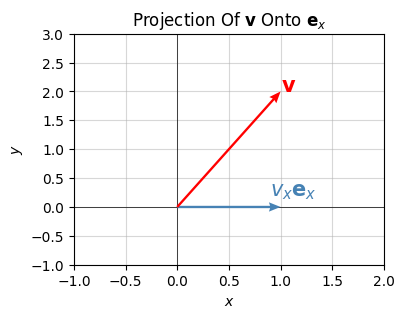

In [9]:
v = np.array([1, 2])
ex = np.array([1, 0])
plot_vectors([v, v[0] * ex], title='Projection Of $\mathbf{v}$ Onto $\mathbf{e}_x$', ticks_every=0.5,
             text_offsets=[[0, 0], [-0.1, 0.2]], colors=['red', 'steelblue'],
             labels=['$\mathbf{v}$', '$v_x \mathbf{e}_x$'], headwidth=4)

Now, you may or may not recall from high school trigonometry that the ratio of the base of a right triangle to its hypotenuse is just the cosine of the angle between them (adjacent over hypotenuse). Since $||\mathbf{v}||$ is the the hypotenuse and $v_x$ is the base, that means

$$\cos \theta = \frac{\text{adjacent}}{\text{hypotenuse}} = \frac{v_x}{||\mathbf{v}||},$$

or equivalently $v_x = \mathbf{v} \cdot \mathbf{e}_x = ||\mathbf{v}|| \cos \theta$. 

I can of course do exactly the same thing with the y-axis too. If $\mathbf{e}_y = (0,1)$ is the unit vector along the y-axis, then the component of $\mathbf{v}$ along the y-axis is just $v_y = \mathbf{v} \cdot \mathbf{e}_y$. This time, the same angle $\theta$ between base and hypotenuse is given by the *sine* of the angle (opposite over hypotenuse), i.e.

$$\sin \theta = \frac{\text{opposite}}{\text{hypotenuse}} = \frac{v_y}{||\mathbf{v}||},$$

or equivalently $v_y = \mathbf{v} \cdot \mathbf{e}_y = ||\mathbf{v}|| \sin \theta$. 

I've thus shown something interesting. We can write the vector $\mathbf{v}$ as a linear combination of the two perpendicular unit vectors $\mathbf{e}_x$ and $\mathbf{e}_y$,

$$\mathbf{v} = v_x \mathbf{e}_x + v_y\mathbf{e}_y = (\mathbf{v} \cdot \mathbf{e}_x)\mathbf{e}_x + (\mathbf{v} \cdot \mathbf{e}_y)\mathbf{e}_y.$$

This is true for *any* vector $\mathbf{v}$ in the plane. Said differently, the pair of vectors $\mathbf{e}_x$ and $\mathbf{e}_y$ form what's called a **basis** for the vector space $\mathbb{R}^2$. Two vectors $\mathbf{a}$ and $\mathbf{b}$ form a basis for $\mathbb{R}^2$ if we can decompose any vector $\mathbf{v} \in \mathbb{R}^2$ into some linear combination of the basis vectors,

$$\mathbf{v} = v_a\mathbf{a} + v_b\mathbf{b}.$$

Another way to say the exact same thing is to say the two basis vectors $\mathbf{a}$ and $\mathbf{b}$ **span** the vector space $\mathbb{R}^2$. To be a valid basis, a basis must be a *minimal* spanning set. That means if the vector space is $2$ dimensional, the basis can only contain two vectors, and those vectors have to span $\mathbb{R}^2$.

The basis consisting of the two vectors $\mathbf{e}_x$ and $\mathbf{e}_y$ is special, in that it satisfies two other useful properties:
1. Both $\mathbf{e}_x$ and $\mathbf{e}_y$ have unit length, i.e. $||\mathbf{e}_x||=||\mathbf{e}_y||=1$. That is, the basis vectors are **normalized**.
2. Their dot product is zero, i.e. $\mathbf{e}_x \cdot \mathbf{e}_y=0$. That is, the basis vectors are **orthogonal**.

A basis satisfying these two properties is called an **orthonormal basis**. An orthonormal basis is special in that it allows us to pick out the components of a vector directly by just taking dot products with the basis vectors. It's only true in an orthonormal basis that we can write the components of a vector $\mathbf{v}$ as,

$$
\begin{align*}
v_x &= \mathbf{v} \cdot \mathbf{e}_x, \\
v_y &= \mathbf{v} \cdot \mathbf{e}_y.
\end{align*}
$$

Here's what this looks like for the vector $\mathbf{v}=(1.25,2)$. Notice the two basis vectors are $90^\circ$ from each other. That's no coincidence. It follows from the fact that $\mathbf{e}_x \cdot \mathbf{e}_y=0$. You'll see why in a second.

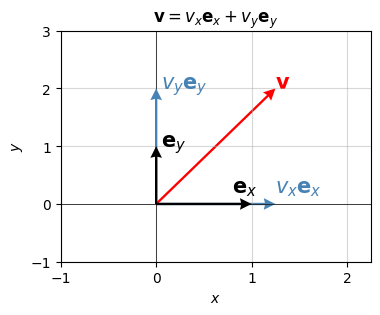

In [10]:
v = np.array([1.25, 2])
ex = np.array([1, 0])
ey = np.array([0, 1])
plot_vectors(
    [v, v[0] * ex, v[1] * ey, ex, ey], colors=['red', 'steelblue', 'steelblue', 'black', 'black'], 
    ticks_every=1, zorders=[0, 1, 2, 3, 4, 5], headwidth=5,
    text_offsets=[[0,0], [0,0.2], [0.05,0], [-0.2,0.2], [0.05,0]],
    title='$\mathbf{v}=v_x \mathbf{e}_x + v_y \mathbf{e}_y$', 
    labels=['$\mathbf{v}$', '$v_x \mathbf{e}_x$', '$v_y \mathbf{e}_y$', '$\mathbf{e}_x$', '$\mathbf{e}_y$'])

Note the pair $\mathbf{e}_x$ and $\mathbf{e}_y$ isn't the only orthonormal basis for $\mathbb{R}^2$ we could choose. For example, the vectors $\mathbf{a}=\frac{1}{\sqrt{2}} (1,1)$ and $\mathbf{b}=\frac{1}{\sqrt{2}} (-1,1)$ also form an orthonormal basis. In this basis, $\mathbf{v}=(1.25, 2)$ would be written

$$\mathbf{v} = (\mathbf{v} \cdot \mathbf{a}) \mathbf{a} + (\mathbf{v} \cdot \mathbf{b}) \mathbf{b} \approx 2.298 \mathbf{a} + 0.530 \mathbf{b}.$$

That's a very different representation for $\mathbf{v}$. In fact, there are infinitely many orthonormal bases for $\mathbb{R}^2$. Just take any two perpendicular vectors in the plane and normalize them to unit length and they'll form an orthonormal basis for $\mathbb{R}^2$.

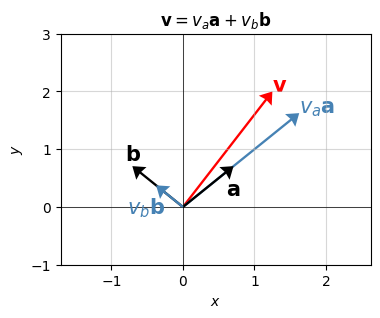

In [11]:
v = np.array([1.25, 2])
a = np.array([1, 1]) / np.sqrt(2)
b = np.array([-1, 1]) / np.sqrt(2)
plot_vectors(
    [v, np.dot(v, a) * a, np.dot(v, b) * b, a, b], colors=['red', 'steelblue', 'steelblue', 'black', 'black'], 
    ticks_every=1, zorders=[0, 1, 5, 3, 4, 2], headwidth=7,
    text_offsets=[[0, 0], [0, 0], [-0.4, -0.5], [-0.1, -0.5], [-0.1, 0.1]],
    title='$\mathbf{v}=v_a \mathbf{a} + v_b \mathbf{b}$', 
    labels=['$\mathbf{v}$', '$v_a \mathbf{a}$', '$v_b \mathbf{b}$', '$\mathbf{a}$', '$\mathbf{b}$'])

### Cosine Similarity

It turns out that we can express the angle between *any* two vectors in the plane using a similar trick. If $\theta$ is the angle between two vectors $\mathbf{v}$ and $\mathbf{w}$, then

$$\mathbf{v} \cdot \mathbf{w} = ||\mathbf{v}|| \cdot ||\mathbf{w}|| \cos \theta.$$

Note that both sides of this equation are scalars since the dot product is a scalar and the product of norms is a scalar. I won't prove this formula here. You can do it using trigonometry, a topic which I've declined to cover because it doesn't really show up in machine learning. The idea here is to use the [Law of Cosines](https://en.wikipedia.org/wiki/Law_of_cosines) on the norm of the difference vector $||\mathbf{v}-\mathbf{w}||$, then equate that with what you get from the dot product of the same difference vector.

It's more common to express this formula with $\cos \theta$ on one side and the vector terms on the other so you can solve for the angle (or more commonly just the cosine of the angle). In this case, we have

$$\cos \theta = \frac{\mathbf{v} \cdot \mathbf{w}}{||\mathbf{v}|| \cdot ||\mathbf{w}||}.$$

What matters more than anything is what this formula says and how to use it. Suppose, for example, you want to find the angle between the two vectors $\mathbf{v} = (1,1)$ and $\mathbf{w} = (0, -1)$. Then you'd have 

$$
\begin{align*}
\mathbf{v} \cdot \mathbf{w} &= 1 \cdot 0 + 1 \cdot (-1) = -1, \\
||\mathbf{v}|| &= \sqrt{1^2 + 1^2} = \sqrt{2}, \\
||\mathbf{w}|| &= \sqrt{0^2 + (-1)^2} = 1.
\end{align*}
$$

Plugging this into the cosine formula gives,

$$
\cos \theta = \frac{-1}{\sqrt{2}} \quad \Longrightarrow \quad \theta = \cos^{-1}\bigg(\frac{-1}{\sqrt{2}}\bigg) = 135^\circ.
$$

You can verify this is correct by plotting the two vectors and confirming that they're about $135^\circ$ from each other, which corresponds to about 1.25 quarter turns around a circle. It's interesting to note that the dot product will only be negative when the angle between the two vectors is obtuse, i.e. more than $90^\circ$, which is of course the case here.

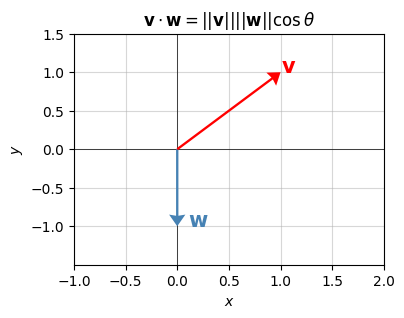

In [12]:
v = np.array([1, 1])
w = np.array([0, -1])
plot_vectors([v, w], title='$\mathbf{v} \cdot \mathbf{w} = ||\mathbf{v}||||\mathbf{w}|| \cos \\theta$', 
             text_offsets=[[0, 0], [0.1, 0]], ticks_every=0.5, xlim=(-1, 2), ylim=(-1.5, 1.5),
             labels=['$\mathbf{v}$', '$\mathbf{w}$'], colors=['red', 'steelblue'], headwidth=7)

In machine learning, this formula for $\cos \theta$ is called **cosine similarity**. The reason for this is that the dot product itself is a measure of how similar two vectors are. To see why, notice what happens if,
- Two vectors are parallel ($\theta = 0^\circ, 180^\circ$): Then $\cos \theta = \pm 1$, so $\mathbf{v} \cdot \mathbf{w} = \pm ||\mathbf{v}||||\mathbf{w}||$. This is as large as the dot product between two vectors can get (in absolute value), since $\cos \theta$ can never be larger than 1 (in absolute value).
- Two vectors are perpendicular ($\theta = 90^\circ, 270^\circ$): Then $\cos \theta = 0$, so $\mathbf{v} \cdot \mathbf{w} = 0$. That is, $\mathbf{v}$ and $\mathbf{w}$ are **orthogonal**. This is as small as the dot product between two vectors can get (in absolute value), since $\cos \theta$ can't be smaller than 0 (in absolute value).

The cosine similarity is a function of two input vectors $\mathbf{v}$ and $\mathbf{w}$. Since we don't actually care about the angle $\theta$ usually, we more commonly denote the cosine using a notation like $\cos(\mathbf{v},\mathbf{w})$ to make it clear it's a function of two vectors,

$$\cos(\mathbf{v},\mathbf{w}) = \frac{\mathbf{v} \cdot \mathbf{w}}{||\mathbf{v}|| \cdot ||\mathbf{w}||}.$$

Two vectors being parallel to each other in some sense means they're very similar. Up to a scalar multiple, they contain the same information. Whereas two vectors being perpendicular means they share pretty much no information. Information about one vector tells you basically nothing about the other.

The cosine similarity is just a normalized dot product, since dividing by the norms forces $-1 \leq \cos(\mathbf{v},\mathbf{w}) \leq 1$. It thus captures the same idea of similarity that the dot product does, but it's more useful when the lengths of vectors get out of control. This is particularly likely to happen in high dimensions, when $n >> 2$. This is the so-called "curse of dimensionality". We'll come back to this idea in future lessons.

Here's a quick implementation of the cosine similarity function using numpy. There's no built-in function to do it, but it's easy enough to implement by making judicious use of the `np.dot` function. It should give the same answer found above for $\cos \theta$, which is $-\frac{1}{\sqrt{2}} \approx -0.707$.

In [13]:
def cosine_similarity(v, w):
    return np.dot(v, w) / np.sqrt(np.dot(v, v) * np.dot(w, w))

print(f'cos(v, w) = {cosine_similarity(v, w)}')

cos(v, w) = -0.7071067811865475


**Algorithm Analysis:** This function uses $O(1)$ (a constant number of) words of memory since apart from the inputs only scalars are being stored or returned. Just so you can practice counting FLOPS, here's an argument that this function will run in $O(n)$ total FLOPS if the vectors passed in are of size $n$. 
- The numerator is just a single dot product, which for a vector of size $n$ uses $2n-1$ FLOPS.
- Assume the square root operation takes some constant number of FLOPS for each scalar, say $c$ FLOPS.
- The denominator consists of two dot product operations, each using $2n-1$ FLOPS. Each product returns a scalar, which then get multiplied together, adding one more FLOP. Finally, the square root of this new scalar takes $c$ more FLOPs. So the denominator is $2(2n-1) + 1 + c = 4n+c-1$ FLOPS.
- The total FLOPS used by the function is thus both of these added together, which is $(2n-1) + 1 + (4n+c-1) = 6n+c-1$ after the division.
- That is, the cosine similarity function runs in $O(n)$ FLOPS, the same as the dot product.

### Other Norms

It turns out that the norm I defined above is only *one* way to measure the length of a vector. It's the most natural way to do so sense it corresponds to your intuitive notions of length, which itself relates to the Pythagorean Theorem. There are other ways to quantify vector length as well that aren't as intuitive. Because they do sometimes show up in machine learning I'll briefly mention a couple of these here.

The norm I've covered is called the **2-norm**. It's called this because it involves squares and square roots. We can write it in the form

$$||\mathbf{v}|| = ||\mathbf{v}||_2 = \big(v_x^2 + v_y^2 \big)^{1/2}.$$

It turns out we can replace the twos with any other positive number $p>1$ to get generalized norms, called **p-norms**,

$$||\mathbf{v}||_p = \big(v_x^p + v_y^p \big)^{1/p}.$$

The p-norms cover a large class of norms, since any $1 \leq p \leq \infty$ can define a valid norm. The 2-norm, as you'd guess, occurs when $p=2$. A couple of other norms that show up in machine learning are the **1-norm** when $p=1$, and the **infinity norm** when $p=\infty$. For 2-dimensional vectors, these norms are

$$
\begin{align*}
||\mathbf{v}||_1 &= |v_x| + |v_y|, \\
||\mathbf{v}||_\infty &= \max\big(|v_x|, |v_y|\big).
\end{align*}
$$

Here's an example. I'll calculate the $p=1, 2, \infty$ norms for the vector $\mathbf{v}=(1,-2)$. We have,

$$
\begin{align*}
||\mathbf{v}||_1 &= |1| + |-2| = 1 + 2 = 3, \\
||\mathbf{v}||_2 &= \sqrt{1^2 + (-2)^2} = \sqrt{1 + 4} = \sqrt{5} \approx 2.236, \\
||\mathbf{v}||_\infty &= \max\big(|1|, |-2|\big) = \max(1, 2) = 2.
\end{align*}
$$

Notice that $||\mathbf{v}||_1 \geq ||\mathbf{v}||_2 \geq ||\mathbf{v}||_\infty$. This is a general fact. 

It's a little hard right now to describe why these norms are useful in machine learning since we don't currently have the context. Just know that these norms do come up sometimes. I'll go into more depth on the uses of these different norms as we apply them. In practice though, we'll probably work with the regular 2-norm maybe 90% of the time.

In numpy, you can calculate any $p$-norm using the function `np.linalg.norm(v, ord=p)`. Here's an example.

In [14]:
v = np.array([1, -2])
print(f'1-Norm of v: {np.linalg.norm(v, ord=1)}')
print(f'2-Norm of v: {np.linalg.norm(v, ord=2)}')
print(f'Infinity-Norm of v: {np.linalg.norm(v, ord=np.inf)}')

1-Norm of v: 3.0
2-Norm of v: 2.23606797749979
Infinity-Norm of v: 2.0


## Linear Maps

So where do matrices fit into all this vector space stuff? It turns out that matrices correspond to functions between vectors to vectors. These are called **linear maps**. A linear map is a vector-valued function from one vector space to another that preserves the properties of vectors. In $\mathbb{R}^2$, a linear map is a function between vectors $\mathbf{v}=(v_x,v_y)$ and $\mathbf{w}=(w_x,w_y)$ of the form

$$\mathbf{w} = (w_x, w_y) = (av_x + bv_y, cv_x + dv_y) = \mathbf{F}(\mathbf{v}).$$

That is, each component of the output vector $\mathbf{w}$ is a linear combination of the input vector $\mathbf{v}$. Now, if you stare at this function for a little bit, you should see that this kind of looks like a $2 \times 2$ system of linear equations,

$$
\begin{alignat*}{2}
   av_x & {}+{} &  bv_y & {}={} & w_x \\
   cv_x & {}+{} &  dv_y & {}={} & w_y
\end{alignat*}.
$$

This of course means the linear map is equivalent to a matrix-vector equation. If we identify $\mathbf{v}$ and $\mathbf{w}$ with $2 \times 1$ column vectors, and define a $\mathbf{A}$ by

$$
\mathbf{A} = 
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix},
$$

then the linear map $\mathbf{w} = \mathbf{F}(\mathbf{v})$ is equivalent to the matrix-vector equation $\mathbf{w}=\mathbf{A}\mathbf{v}$, or

$$\mathbf{F}(\mathbf{v}) = \mathbf{A}\mathbf{v}.$$

In fact, *every* linear map $\mathbf{F}(\mathbf{v})$ can be identified with some matrix equation $\mathbf{A}\mathbf{v}$. Knowing $\mathbf{A}$ (in some basis) is equivalent to knowing the linear map itself.

But why are linear maps important? The main reason is that they preserve linear structure. Notice that I can define a line through any vector $\mathbf{v}$ by scaling it with some parameter $t$. If I apply a linear map to this line I'd get $\mathbf{F}(t\mathbf{v}) = t\mathbf{F}(\mathbf{v})$. Check it yourself from the definition. Said differently, linear maps map lines to lines, thus preserving the linear structure of the vector space. The new line won't usually be the *original* line. It may get rotated. But it's still a line.

Let's try to visualize what a linear map does by defining a particular $2 \times 2$ matrix $\mathbf{A}$ and seeing how it acts on inputs $\mathbf{v}$.

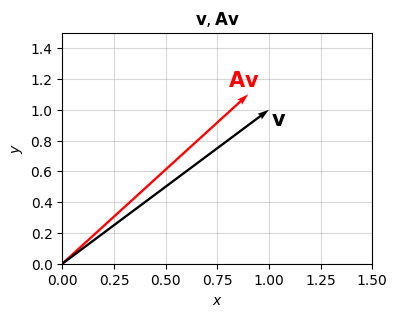

In [15]:
A = np.array([[1, -0.1], [0.1, 1]])
v = np.array([1, 1]).reshape(-1, 1)
plot_vectors([v.flatten(), (A @ v).flatten()], colors=['black', 'red'],
             labels=['$\mathbf{{v}}$', '$\mathbf{{A}}\mathbf{{v}}$'], text_offsets=[[0.01, -0.1], [-0.1, 0.05]],
             title='$\mathbf{{v}}, \mathbf{{A}}\mathbf{{v}}$',  xlim=(0, 1.5), ylim=(0, 1.5))

Why stop there? Let's apply the linear map a whole bunch of times recursively and see what happens to the output vectors $\mathbf{w}$. I'll plot each of the $k=63$ vectors in the following sequence,

$$\mathbf{v}, \ \mathbf{A}\mathbf{v}, \ \mathbf{A}^2\mathbf{v}, \ \cdots, \ \mathbf{A}^{63}\mathbf{v}.$$

Note each power $\mathbf{A}^j$ here is a *matrix power*, defined by applying *matrix multiplication* over and over $k$ times. It's *not* the element-wise power.

For the particular values in this plot I'll choose $\mathbf{v}=\begin{pmatrix} 1 \\ 1 \end{pmatrix}$ and $\mathbf{A}=\begin{pmatrix} 1 & -0.1 \\ 0.1 & 1 \end{pmatrix}$. The original vector $\mathbf{v}$ is colored black. Notice that each linear map is slowly rotating the vector counterclockwise and also slightly stretching it. By the time it gets back around it's already maybe 40% longer than the original vector.

In fact, *every* linear map between two vectors in the plane will do at least one of these two things: rotate the input vector in the plane, or stretch (or shrink) it by some factor. I just chose a particularly nice one to plot.

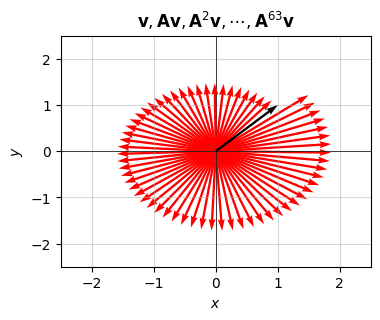

In [16]:
k = 63
vectors = [(np.linalg.matrix_power(A, i) @ v).flatten() for i in range(k)]
title = f"""
$\mathbf{{v}}, \mathbf{{A}}\mathbf{{v}}, \mathbf{{A}}^2\mathbf{{v}}, \cdots, \mathbf{{A}}^{{{k}}}\mathbf{{v}}$
""".strip()
plot_vectors(vectors, colors=['black']+['red']*(k-1), title=title, xlim=(-2.5, 2.5), ylim=(-2.5, 2.5))

What do you suppose the transpose of $\mathbf{A}$ does in this particular example? That is, suppose you use $\mathbf{A}^\top$ instead. Notice what would happen is the minus sign would move from the upper right to the lower left. You can verify that this will just cause the matrix to spin vectors the other way, clockwise instead of counterclockwise.

Two other special linear maps worth being aware of are the identity map and the inverse map. The identity map is the map $\mathbf{F}(\mathbf{v}) = \mathbf{I}\mathbf{v}$. What does it do to $\mathbf{v}$? Let's see. We can get the identity matrix in numpy using `np.eye(n)`, where `n` is the dimension (in this case 2).

It looks like nothing is happening. That is, $\mathbf{I}\mathbf{v} = \mathbf{v}$. You can verify this by writing this out in components and seeing what the matrix-vector product is. In fact, $\mathbf{I}\mathbf{v} = \mathbf{v}$ is *always* true, for any dimension, and any vector $\mathbf{v}$.

**Aside:** Notice that I had to *flatten* the vectors here to do the plot. That's because I've sneakily defined vectors in two different ways, first as a *column* vector of shape $(2,1)$ and *then* as a *flat* vector of shape $(2,)$.

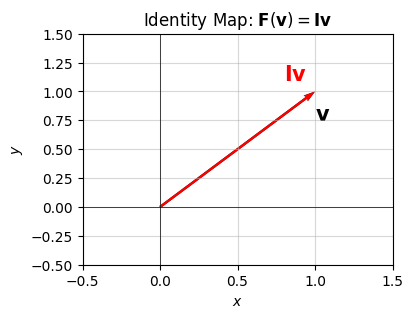

In [17]:
I = np.eye(2)
plot_vectors([v.flatten(), (I @ v).flatten()], zorders=[0, 1],
             title='Identity Map: $\mathbf{F}(\mathbf{v})=\mathbf{I}\mathbf{v}$',
             labels=['$\mathbf{v}$', '$\mathbf{I}\mathbf{v}$'],
             colors=['black', 'red'], xlim=(-0.5, 1.5), ylim=(-0.5, 1.5), 
             text_offsets=[[0, -0.25], [-0.2, 0.1]])

The inverse map is just the linear map that undoes the original linear map $\mathbf{F}(\mathbf{v}) = \mathbf{A}\mathbf{v}$, i.e.

$$\mathbf{F}^{-1}(\mathbf{v}) = \mathbf{A}^{-1}\mathbf{v}.$$

You can see what this does by applying the two maps in succession. Here's an example of doing this with the vector $\mathbf{v}=(1,1)$ and the $90^\circ$ rotation matrix

$$\mathbf{A}=\begin{pmatrix} 0 & 1 \\ -1 & 0 \end{pmatrix}.$$

Applying $\mathbf{F}(\mathbf{v})$ followed by $\mathbf{F}^{-1}(\mathbf{v})$ just gives the same vector $\mathbf{v}$ back. This just follows from the fact that $\mathbf{A}^{-1}\mathbf{A}=\mathbf{I}$, so the composition $\mathbf{F}^{-1}(\mathbf{F}(\mathbf{v}))=\mathbf{v}$.

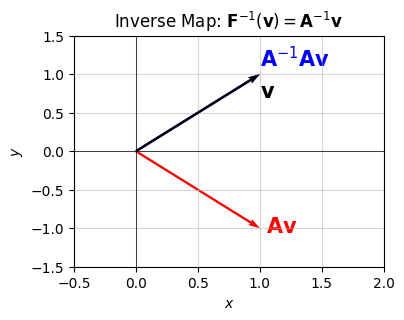

In [18]:
A = np.array([[0, 1], [-1, 0]])
plot_vectors([v.flatten(), (A @ v).flatten(), (np.linalg.inv(A) @ A @ v).flatten()], zorders=[2, 1, 0],
             title='Inverse Map: $\mathbf{F}^{-1}(\mathbf{v})=\mathbf{A}^{-1}\mathbf{v}$',
             labels=['$\mathbf{v}$', '$\mathbf{A}\mathbf{v}$', '$\mathbf{A}^{-1}\mathbf{A}\mathbf{v}$'],
             colors=['black', 'red', 'blue'], xlim=(-0.5, 2), ylim=(-1.5, 1.5), 
             text_offsets=[[0, -0.3], [0.05, -0.05], [0, 0.1]])

In fact, we've learned something new here and kind of deep. Matrix multiplication is *equivalent* to the composition of linear maps! If $\mathbf{F}(\mathbf{v}) = \mathbf{A}\mathbf{v}$ and $\mathbf{G}(\mathbf{w}) = \mathbf{B}\mathbf{w}$ are two linear maps, then their composite function $\mathbf{G}(\mathbf{F}(\mathbf{v}))$ is another linear map given by

$$\mathbf{G}(\mathbf{F}(\mathbf{v})) = \mathbf{B}\mathbf{A}\mathbf{v}.$$

This is the *real* reason matrix multiplication is important. Because linear maps are important, and applying multiple linear maps is just matrix multiplication!

I'll close this section by mentioning that we're often not interested in *linear maps* in practice, but *affine maps*. An **affine map** is just a linear map shifted by some vector $\mathbf{b}$, often called a **bias vector** in machine learning,

$$\mathbf{F}(\mathbf{v}) = \mathbf{A}\mathbf{v} + \mathbf{b}.$$

The only difference between an affine map and a linear map is that vectors will get not just scaled and rotated, but also *translated* or *shifted* by $\mathbf{b}$. Here's the same of recursive matrix powers, but this time with a bias vector included. I'll take a bias vector of $\mathbf{b}=\binom{0}{-0.02}$ but use the same choice for $\mathbf{A}$ and $\mathbf{v}$. I'll plot the following recursive sequence,

$$\mathbf{v}, \ \mathbf{A}\mathbf{v} + \mathbf{b}, \ \mathbf{A}^2\mathbf{v} + 2\mathbf{b}, \ \cdots, \ \mathbf{A}^{63}\mathbf{{v}} + 63\mathbf{b}.$$

What's happening now is that all the tails of all the output vectors are slowly getting shifted downward by $-0.02$ at every step. You can see that the center of mass of all the vectors seems to be shifted down, distorting the somewhat circular spiral shape from before. It's also curious to note that the circle no longer closes anymore. Without the bias vector, $k=63$ maps would close the circle up, but now with the bias vector it's leaving a chunk empty.

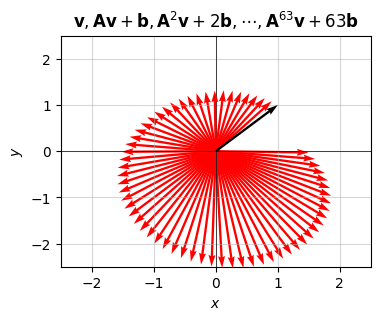

In [19]:
A = np.array([[1, -0.1], [0.1, 1]])
v = np.array([1, 1]).reshape(-1, 1)
b = np.array([0, -0.02]).reshape(-1, 1)
k = 63
vectors = [(np.linalg.matrix_power(A, i) @ v + i * b).flatten() for i in range(k)]
title = f"""
$\mathbf{{v}}, \mathbf{{A}}\mathbf{{v}} + \mathbf{{b}}, 
\mathbf{{A}}^2\mathbf{{v}} + 2\mathbf{{b}}, \cdots, \mathbf{{A}}^{{{k}}}\mathbf{{v}} + {k}\mathbf{{b}}$
""".replace('\n', '')
plot_vectors(vectors, colors=['black']+['red']*(k-1), title=title, xlim=(-2.5, 2.5), ylim=(-2.5, 2.5))

## $n$-dimensional Vector Spaces

It may seem like everything I've said is special for the case of $n=2$ dimensions, but it's really not. Every single thing I've said extends exactly how you'd expect to vectors of arbitrary size $n$. The only difference now is that you can't visualize the stuff anymore. You just have to trust the math. I'll restate all of the definitions from above here, but for $n$-dimensional vector spaces instead.

A **vector** of size $n$ can be defined as a 1-dimensional array of real numbers $x_0,x_1,x_2,\cdots,x_{n-1}$,

$$\mathbf{x} = (x_0,x_1,x_2,\cdots,x_{n-1}).$$

Vectors can be added together, and multiplied by scalars. Vector addition is defined element-wise. If $\mathbf{x}$ and $\mathbf{y}$ are two vectors, then

$$\mathbf{x} + \mathbf{y} = (x_0+y_0, x_1+y_1, \cdots, x_{n-1}+y_{n-1}).$$

To keep a running example through this section, I'll use numpy to create two vectors $\mathbf{x}$ and $\mathbf{y}$ each of size $n=10$. Here's their vector sum.

In [20]:
x = np.array([1, 2, 3, 4, 5, 5, 4, 3, 2, 1])
y = np.array([1, 0, -1, 0, 1, 0, -1, 0, 1, 0])

print(f'x + y = {x + y}')

x + y = [2 2 2 4 6 5 3 3 3 1]


Scalar multiplication is defined similarly. If $c \in \mathbb{R}$ is some scalar and $\mathbf{x}$ is some vector, then

$$c\mathbf{x} = (cx_0,cx_1,\cdots,cx_{n-1}).$$

In [21]:
c = 5
print(f'c * x = {c * x}')

c * x = [ 5 10 15 20 25 25 20 15 10  5]


Vectors of size $n$ live in the $n$-dimensional **vector space** $\mathbb{R}^n$. By definition, any **linear combination** of two vectors must also live in the same vector space. That is, if $\mathbf{x}, \mathbf{y} \in \mathbb{R}^n$ are two vectors and $a,b \in \mathbb{R}$ are two scalars, then $a \mathbf{x} + b \mathbf{y} \in \mathbb{R}^n$.

The **dot product** between two vectors $\mathbf{x}$ and $\mathbf{y}$ of size $n$ is defined as their sum product, i.e.

$$\mathbf{x} \cdot \mathbf{y} = x_0y_0 + x_1y_1 + \cdots + x_{n-1}y_{n-1}.$$

In [22]:
print(f'x . y = {np.dot(x, y)}')

x . y = 1


The **norm** (technically the **2-norm**) of a vector is defined as the square root of its dot product with itself, i.e.

$$||\mathbf{x}|| = ||\mathbf{x}||_2 = \sqrt{\mathbf{x} \cdot \mathbf{x}} = \sqrt{x_0^2 + x_1^2 + \cdots + x_{n-1}^2}.$$

This is just the $n$-dimensional generalization of the Pythagorean Theorem. We can also consider other $p$ norms as well. In particular, the cases when $p=1$ and $p=\infty$ sometimes show up in applications,

$$
\begin{align*}
||\mathbf{x}||_1 &= \sum_{i=0}^{n-1} |x_i| = |x_0| + |x_1| + \cdots + |x_{n-1}|, \\
||\mathbf{x}||_\infty &= \max_{i=0,\cdots,n-1} |x_i| = \max\big(|x_0|, |x_1|, \cdots, |x_{n-1}|\big).
\end{align*}
$$

It will always be the case that $||\mathbf{x}||_1 \geq ||\mathbf{x}||_2 \geq ||\mathbf{x}||_\infty$.

In [23]:
print(f'1-Norm of x: {np.linalg.norm(x, ord=1)}')
print(f'2-Norm of x: {np.linalg.norm(x, ord=2)}')
print(f'Infinity-Norm of x: {np.linalg.norm(x, ord=np.inf)}')

1-Norm of x: 30.0
2-Norm of x: 10.488088481701515
Infinity-Norm of x: 5.0


We can define the angle between any two vectors $\mathbf{x}$ and $\mathbf{y}$ of size $n$ by making use of the same identity for the dot product, which still holds in $n$ dimensions,

$$\mathbf{x} \cdot \mathbf{y} = ||\mathbf{x}|| \cdot ||\mathbf{y}|| \cos \theta.$$

Using this identity, we can define the **cosine similarity** $\cos(\mathbf{x}, \mathbf{y})$ by solving for $\cos \theta$,

$$\cos(\mathbf{x}, \mathbf{y}) = \frac{\mathbf{x} \cdot \mathbf{y}}{||\mathbf{x}|| \cdot ||\mathbf{y}||}.$$

The dot product is a measure of how similar two vectors are, and the cosine similarity is a *normalized* measure of how similar two vectors are, since dividing by the norms forces $-1 \leq \cos \theta \leq 1$.

In [24]:
print(f'cos(x, y) = {cosine_similarity(x, y)}')

cos(x, y) = 0.04264014327112208


We can define an orthonormal basis on the vector space $\mathbb{R}^n$ by defining the following complete set of unit vectors, each of size $n$,

$$
\begin{align*}
\mathbf{e}_0 &= (1, 0, 0, \cdots, 0), \\
\mathbf{e}_1 &= (0, 1, 0, \cdots, 0), \\
\vdots \ &= \qquad \vdots \\
\mathbf{e}_{n-1} &= (0, 0, 0, \cdots, 1).
\end{align*}
$$

A complete set of $n$ basis vectors is said to **span** the vector space $\mathbb{R}^n$. To be a valid **basis**, there must be exactly $n$ vectors in the set. To be an **orthonormal basis**, each vector in the basis set must also be a unit vector, and be mutually orthogonal with *every* other vector in the basis set, i.e.

$$
\mathbf{e}_i \cdot \mathbf{e}_j = \delta_{ij} = 
\begin{cases}
1 & i = j, \\
0 & i \neq j.
\end{cases}
$$

The symbol $\delta_{ij}$ is called the **Kronecker delta**. It's just a shorthand way of writing something is $1$ if $i=j$ and $0$ if $i \neq j$.

In [25]:
n = 10
e = [ei.flatten().astype(int) for ei in np.eye(n)]
print(f'e3 = {e[3]}')
print(f'e8 = {e[8]}')
print(f'e3 . e3 = {np.dot(e[3], e[3])}')
print(f'e3 . e8 = {np.dot(e[3], e[8])}')

e3 = [0 0 0 1 0 0 0 0 0 0]
e8 = [0 0 0 0 0 0 0 0 1 0]
e3 . e3 = 1
e3 . e8 = 0


If a basis is orthonormal, any vector $\mathbf{x}$ can be decomposed into a linear combination of the basis elements by taking the dot product $\mathbf{x} \cdot \mathbf{e}_i$. For the standard basis, these just give the vector components $x_i$,

$$\mathbf{x} = \sum_{i=0}^{n-1} (\mathbf{x} \cdot \mathbf{e}_i) \mathbf{e}_i = \sum_{i=0}^{n-1} x_i \mathbf{e}_i = x_0 \mathbf{e}_0 + x_1 \mathbf{e}_1 + \cdots x_{n-1} \mathbf{e}_{n-1}.$$

Each term $x_i \mathbf{e}_i$ in the sum corresponds to the **projection** of $\mathbf{x}$ onto the $i$<sup>th</sup> axis. Each axis in $\mathbb{R}^n$ is still a single line, but now there are $n$ of these axis lines, all perpendicular to each other.

A **linear map** is a vector-valued function $\mathbf{y}=\mathbf{F}(\mathbf{x})$ between vector spaces that preserves the linear structure of the spaces. In general, $\mathbf{x} \in \mathbb{R}^m$ and $\mathbf{y} \in \mathbb{R}^n$ need not be in the same vector spaces. Either way, a linear map can always be expressed as a matrix-vector equation $\mathbf{y}=\mathbf{A}\mathbf{x}$, where $\mathbf{A}$ is some $m \times n$ matrix. More generally, an **affine map** is a linear map shifted by some **bias vector** $\mathbf{b} \in \mathbb{R}^m$. Affine maps can always be expressed as a shifted matrix-vector equation, $\mathbf{y}=\mathbf{A}\mathbf{x} + \mathbf{b}$.

**Aside:** Roughly speaking a neural network is just a composite function of successive affine maps, except that one adds a *nonlinearity* function $\boldsymbol{\sigma}(\mathbf{x})$ in between each successive affine map to make it nonlinear. For example, the following nonlinear function could represent a "one hidden layer" neural network,

$$\mathbf{y} = \boldsymbol{\sigma}_2\big(\mathbf{A}_2\boldsymbol{\sigma}_1(\mathbf{A}_1\mathbf{x} + \mathbf{b}_1) + \mathbf{b}_2\big).$$

The nonlinearity functions that get chosen are rarely exotic. Most of the time they're all just the ReLU function $\boldsymbol{\sigma}(\mathbf{x})=\max(\mathbf{0}, \mathbf{x})$, except in the output layer. The coefficients in the matrices and bias vectors become the parameters of the network and get learned from the training data.

Just as with linear maps in the plane, linear maps in higher dimensions always preserve lines. Not just lines in fact, but planes and hyperplanes as well. These generalizations of lines are called **linear subspaces**. Linear subspaces will always be hyperplanes in $n$-dimensional space that pass through the origin. Think of them as planes passing through the origin, but in more dimensions. If the hyperplane spanned by $\mathbf{x}_0, \mathbf{x}_1, \cdots, \mathbf{x}_{k-1}$ is some $k$-dimensional linear subspace of $\mathbb{R}^n$, then its **image** under the linear map will be a new $k$-dimensional linear subspace in $\mathbb{R}^m$ (if $k \leq m$, otherwise it'll just be the full vector space $\mathbb{R}^m$ itself). Any linear combination of vectors in a given subspace will stay inside that subspace. It's *closed* under vector space operations. For all practical purposes it's a new vector space $\mathbb{R}^k$ unto itself.

Linear maps in higher dimensions also correspond to scaling and rotation vectors in $n$-dimensions. However, if $m \neq n$, a linear map *also* maps vectors into some new dimensional space. If $m > n$ the map is called an **embedding**. If $m < n$ the map is called a **projection**. 

I realize this last bit about subspaces might seem a bit advanced and abstract. I just want you to be familiar with the terminology more than anything. If this stuff comes up again in future lessons I'll go into it more.